In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()))) # add parent folder to path
from flow import Paths
from figures.seqplots import plot_rep, plot_abcd, plot_seqs
from seq import rep
Folder, _, _, _ = Paths.ExpData()

## Stimuli 

We used sequences whihc were all unique permutations of four items. Here sequences are displayed in numeric format and indicate which items are at which positions. E.g sequence $[3, 1, 4, 2]$ should be read as: item 3 at 1st position, item 1 at 2nd position, etc. For illustrative purposes we use letters $A,B,C,D$ as item codes here so $[3, 1, 4, 2]$ becomes $[C, A, D, B]$. 

In [7]:
file_seq = os.path.join(Folder['SourceData'], 'sequences_individual.tsv')  # Import all sequences from CSV file.
Seq = pd.read_csv(file_seq).values # load individual sequences
Seq

array([[3, 1, 4, 2],
       [2, 4, 1, 3],
       [1, 2, 3, 4],
       [4, 3, 1, 2],
       [4, 2, 1, 3],
       [1, 4, 2, 3],
       [1, 3, 4, 2],
       [4, 1, 3, 2],
       [4, 2, 3, 1],
       [1, 3, 2, 4],
       [1, 2, 4, 3],
       [4, 1, 2, 3],
       [1, 4, 3, 2],
       [4, 3, 2, 1]])

### Positional representation of a single sequence
A positional representation of a sequence assumes associations between items and their positions in a sequence. These associations can be represented as a matrix. E.g. for the first sequence $[3,1,4,2]$ or 'CABD' we have the following matrix plot. In the first case there is no noise in the representation of a sequence meaning that the probability of recalling/storing each item at its designated position is 1. At the bottom plot we have added gaussian noise across item/position values to model noisy representations to allow errors: the $\sigma$ variable controls the standard deviation for Gaussian kernel (as defined here: https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.gaussian_filter.html).

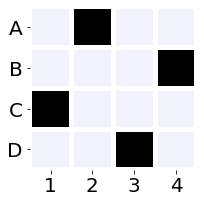

In [11]:
# sigma = standard deviation for Gaussian kernel 
# sequence representation without noise
r = rep.seq_to_matrix(Seq[0], model='ip', sigma=0)
fig = plot_abcd(r, model='ip')
# sequence representation with noise, sigma=5
r = rep.seq_to_matrix(Seq[0], model='ip', sigma=0.5)
fig = plot_abcd(r, model='ip')

### Positional representation of all sequences

The matrix above is now flattened into a single row vector so that columns each represent a single association between an item and order position (e.g. 'B4' represents 'B' occuring at the 4th position.). 
Gaussian noise is distributed across these associative representations to represent the probability of an error of recalling item at a wrong position -- e.g. for 'CADB' we have association 'A2' having the greatest value but also adjacent 'A1' and 'A3'. $\sigma$ (sigma) parameter controls the spread / variance of the noise across associations.

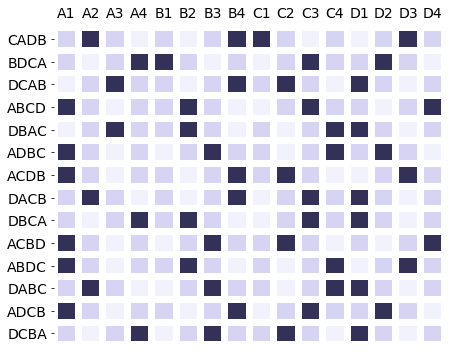

In [5]:
sigma=0.5
fig = plt.figure(figsize=(7, len(Seq) / 2.4))
plot_seqs(Seq, model='ip', sigma=sigma);

The representation above can be transformed into a model of a neural population response. 
We assume a neural population of $N=160$ neural units where each individual unit $n$ has a response function sepcifying a probability of responding to a particular association between an item and order position. E.g. a single unit might mostly respond to A occuring at the 2nd position but also somewhat to A occuring at 1st and 3rd positions (as pictured below and described above). 

In [8]:
# single unit's response centred at A2
# unit's reposne profile can also be shown on a 4x4 matrix
s = np.array([0,1,0,0])
r = rep.seq_to_matrix(s, model='unit', sigma=0.5)
fig = plot_abcd(r, model='ip')

Here we assume that the population is balanced -- any item occuring at any position elicits equal response -- but one could similarly create a biased population where positions at the start of the sequence elicit more response etc. 

## Experimental design

In the fMRI experiment we presented a block where 12 novel sequences were presented once and 2 learned sequences each 12 times. This resulted in 36 trials as shown for a single subject below.

In [9]:
file_exp = os.path.join(Folder['SourceData'], 'sub-01_task.tsv')  # Import all sequences from CSV file.
T = pd.read_csv(file_exp, index_col=0) # load individual sequences

Seq  Seq_Id  Is_Learned  Is_Recall  Rest  Onset  Duration
0   [2 4 3 1]       2           2          1     5     10        30
1   [4 3 1 2]       3           0          0     4     40        22
2   [3 1 4 2]       1           1          1     4     62        28
3   [2 4 3 1]       2           2          1     6     90        32
4   [1 2 3 4]       4           0          1     4    122        28
5   [3 1 4 2]       1           1          0     3    150        20
6   [3 1 4 2]       1           1          1     5    170        30
7   [4 2 1 3]       5           0          1     6    200        32
8   [2 4 3 1]       2           2          1     4    232        28
9   [3 1 4 2]       1           1          0     5    260        24
10  [2 4 3 1]       2           2          1     5    284        30
11  [1 4 2 3]       6           0          1     5    314        30
12  [1 3 4 2]       7           0          1     5    344        30
13  [2 4 3 1]       2           2          0     5    374        24
14  [3 1 4 2]       1           1          1     5    398        30
15  [4 1 3 2]       8           0          1     5    428        30
16  [2 4 3 1]       2           2          1     5    458        30
17  [3 1 4 2]       1           1          0     6    488        26
18  [2 4 3 1]       2           2          1     5    514        30
19  [3 1 4 2]       1           1          1     5    544        30
20  [4 2 3 1]       9           0          1     5    574        30
21  [3 1 4 2]       1           1          0     3    604        20
22  [2 4 3 1]       2           2          1     4    624        28
23  [1 3 2 4]      10           0          1     3    652        26
24  [1 2 4 3]      11           0          1     5    678        30
25  [3 1 4 2]       1           1          0     5    708        24
26  [2 4 3 1]       2           2          1     5    732        30
27  [4 1 2 3]      12           0          1     5    762        30
28  [3 1 4 2]       1           1          1     3    792        26
29  [2 4 3 1]       2           2          0     3    818        20
30  [2 4 3 1]       2           2          1     5    838        30
31  [1 4 3 2]      13           0          1     4    868        28
32  [3 1 4 2]       1           1          1     5    896        30
33  [2 4 3 1]       2           2          0     6    926        26
34  [3 1 4 2]       1           1          1     3    952        26
35  [4 3 2 1]      14           0          1     5    978        30

An example of a population response of 160 units to those 36 trials is plotted below ($\sigma=0.5$).

In [10]:
Seq_task = Seq[np.array(T['Seq_Id'])-1]
fig = plt.figure(figsize=(7, len(Seq_task) / 2.4))
plot_seqs(Seq_task, model='ip', sigma=0.5);